Set up the environment:

In [1]:
%matplotlib inline
import sambuca as sb
import numpy as np
import pylab
from pkg_resources import resource_filename
from scipy.io import loadmat
from scipy.signal import resample

Load the matlab reference data from sambuca:

In [2]:
filename = resource_filename(
            sb.__name__,
            'tests/data/test_resample.mat')
data = loadmat(filename, squeeze_me=True)
data.keys()

dict_keys(['filt', 'resampled_spectra', 'bandsum', 'modelled_spectra', '__globals__', '__header__', '__version__', 'filtsum', 'calc'])

Grab the 1nm input spectra and plot it so we know what we are looking at:

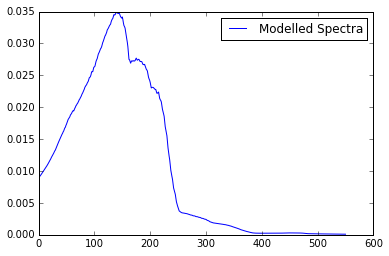

In [9]:
src_spectra = data['modelled_spectra']
pylab.plot(src_spectra, label='Modelled Spectra')
pylab.legend(loc='upper right');

Grab the matlab-produced resampled spectra:

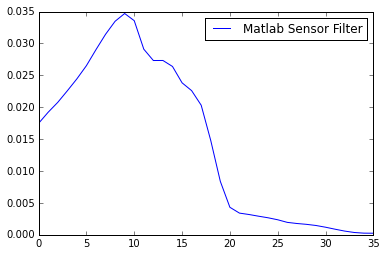

In [10]:
ml_spectra = data['resampled_spectra']
pylab.plot(ml_spectra, label='Matlab Sensor Filter')
pylab.legend(loc='upper right');

Scipy.signal.resample with default window:

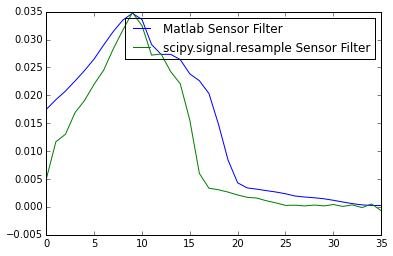

In [11]:
num_dest_bands = ml_spectra.shape[0]
sp_spectra = resample(src_spectra, num_dest_bands)
pylab.plot(ml_spectra, label='Matlab Sensor Filter')
pylab.plot(sp_spectra, label='scipy.signal.resample Sensor Filter')
pylab.legend(loc='upper right');

Use the Sambuca Python sensor filter implementation:

In [6]:
sensor_filter = data['filt'].transpose()
sb_spectra = sb.apply_sensor_filter(src_spectra, sensor_filter)
sb_spectra

array([ 0.01747397,  0.01921462,  0.02075889,  0.02256969,  0.02444502,
        0.02652015,  0.02903243,  0.03143735,  0.03348361,  0.03470245,
        0.03357715,  0.02910702,  0.0273295 ,  0.02733656,  0.02639649,
        0.02383265,  0.02260655,  0.02031933,  0.01478162,  0.00837654,
        0.00431365,  0.00340133,  0.00318089,  0.00291656,  0.00266701,
        0.00235675,  0.0019493 ,  0.00177315,  0.00164139,  0.00145973,
        0.00118958,  0.0008761 ,  0.0005831 ,  0.00036315,  0.00025913,
        0.00024619])

Confirm that the Sambuca function output matches the Matlab output:

In [7]:
np.allclose(ml_spectra, sb_spectra)

True

Finally, plot everything:

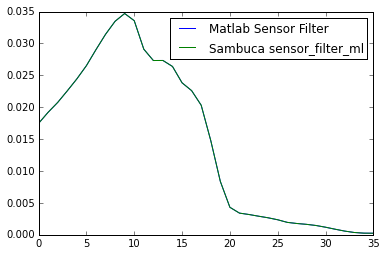

In [13]:
pylab.plot(ml_spectra, label='Matlab Sensor Filter')
#pylab.plot(sp_spectra, label='scipy.signal.resample Sensor Filter')
pylab.plot(sb_spectra, label='Sambuca sensor_filter_ml')
pylab.legend(loc='upper right');